In [18]:
!pip install keras==2.7.0
!pip install matplotlib==3.2.2
!pip install numpy==1.19.5
!pip install sklearn
!pip install tensorflow==2.7.0

## Used packages

In [1]:
import matplotlib.pylab as plt
import numpy as np
import tensorflow as tf
from itertools import cycle
from sklearn.metrics import classification_report,f1_score,accuracy_score,recall_score,precision_score
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils  import plot_model
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from keras.layers import Conv2D, Dense, AvgPool2D, Dropout, Flatten, MaxPool2D
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.callbacks import TensorBoard
from time import time

## Used functions

In [2]:
#Pré_traitements des images du dataset fetch_olivetti_faces()
def pretraitement(X,y):
  
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
  #Preprocessing dataset
  X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
  y_train = to_categorical(y_train, num_classes = 40)
  X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))
  y_test = to_categorical(y_test, num_classes = 40)

  X_train = tf.image.grayscale_to_rgb(tf.constant(X_train))
  X_test = tf.image.grayscale_to_rgb(tf.constant(X_test))
  X_train = tf.pad(X_train, ((0, 0), (12, 12), (12, 12), (0, 0)))
  X_test = tf.pad(X_test, ((0, 0), (12, 12), (12, 12), (0, 0)))
  return X_train, y_train,X_test,y_test

In [3]:
# Different evaluation metrics of the model
def evaluation_metrics(y_test,y_predict,classes_names=None):
  print('Recall_score :',recall_score(y_test, y_predict,average='micro'))
  print('Precision_score:',precision_score(y_test, y_predict,average='micro'))
  print('F1_score :',f1_score(y_test, y_predict,average='micro'))
  print('Model acccuracy:',accuracy_score(y_test, y_predict))
  if classes_names:
    print(classification_report(y_test, y_predict,target_names=classes_names))

In [4]:
def plot_training_history(history):
  # summarize history for accuracy
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

In [5]:
def generate_data(data,target,test_size):
  # Fixing the seed to obtain consistent results
  tf.random.set_seed(7)
  X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=7,test_size=test_size)
  X_train = np.array(X_train)
  y_train = np.array(y_train)
  y_test = np.array(y_test)
  X_test = np.array(X_test)
  return X_train, X_test, y_train, y_test


In [6]:
def plot_images(images):
  print("*****  Some image samples ******")
  # Plot first few images
  for i in range(9):
    # Define subplot
    plt.subplot(330 + 1 + i)
    # Plot raw pixel data
    plt.imshow(images[i], cmap=plt.get_cmap('gray'))
  # Show the figure
  plt.show()
  

In [7]:
def plot_augmented_images(image_generator,shape_after=(64,64)):
  print("*****  Some image samples ******")
  # Plotting augmented images
  for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # generate batch of images
    batch = image_generator.next()
    # convert to unsigned integers for viewing
    image = batch[0][0].reshape(shape_after[0],shape_after[1])
    # plot raw pixel data
    plt.imshow(image,cmap="gray")
  # show the figure
  plt.show()

###Creating LE-NET5 model architecture
Having the following architecture but with different input shape
![picture](https://i.ibb.co/sw78RM0/Capture-d-cran-2021-12-27-085537.png)

In [8]:
def create_lenet15_model(nb_labels,input_shape=(64,64,1)):
  model = Sequential()
  model.add(Conv2D(filters=6, kernel_size=(5,5), padding='same', activation='tanh', input_shape=input_shape))
  model.add(AvgPool2D(strides=2))
  model.add(Conv2D(filters=16, kernel_size=(5,5), padding='valid', activation='tanh'))
  model.add(AvgPool2D(strides=2))
  model.add(Conv2D(filters=120, kernel_size=(5,5), padding='valid', activation='tanh'))
  model.add(Flatten())
  model.add(Dense(84, activation='tanh'))
  model.add(Dense(nb_labels, activation='softmax'))
  model.compile(loss=keras.losses.sparse_categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
  return model

In [9]:
def resize_images(images):
  imgs_res = []
  for image in images:
    # Normalize images to have a mean of 0 and standard deviation of 1
    image = tf.image.per_image_standardization(image)
    # Resize images from 32x32 to 277x277
    image = tf.image.resize(image, (227,227))
    imgs_res.append(image)
  return imgs_res

##Part 1 : CNN


#### Importing/Preprocessing the DIGIT dataset


digit_labels_count =  10
digitData_data_resh shape =  (1797, 28, 28, 1)
X_train_digit shape =  (1257, 28, 28, 1)
*****  Some image samples ******


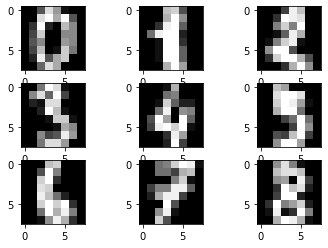

In [10]:
digit_model_input_shape = (28,28,1)
# Importing DIGIT dataset
digitData = datasets.load_digits()
digit_labels_count = len(np.unique(digitData.target))
digit_shape = int(digitData.data.shape[1]**(0.5))
print("digit_labels_count = ",digit_labels_count)
# Reshape images to digit_shape
digitData_data_resh= digitData.data.reshape(digitData.data.shape[0],digit_shape, digit_shape,1)
# Pad images with 0s
pad_width = pad_height = (digit_model_input_shape[0]-digit_shape)//2
pad_shape_digit = (pad_width,pad_height)
digitData_data_resh = np.pad(digitData_data_resh, [(0,0),pad_shape_digit,pad_shape_digit,(0,0)], 'constant',constant_values=0.)
print("digitData_data_resh shape = ",digitData_data_resh.shape)
# Split and shuffle
X_train_digit, X_test_digit, y_train_digit, y_test_digit = generate_data(digitData_data_resh, digitData.target,0.3)
print("X_train_digit shape = ",X_train_digit.shape)
# Plotting images
plot_images(digitData.images)

(1257, 227, 227, 1)


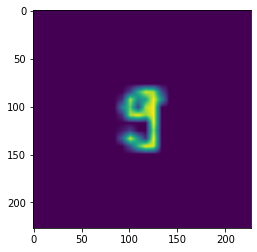

In [11]:
resized_digits_train = np.array(resize_images(X_train_digit))
plt.imshow(tf.reshape(resized_digits_train[0],[227,227]))
print(resized_digits_train.shape)

*****  Some image samples ******


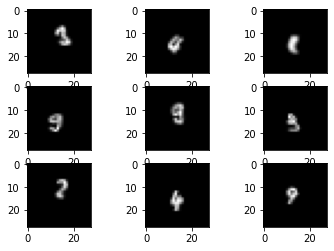

In [12]:
# Data Augmentation
datagen = ImageDataGenerator(
            rotation_range=10,
            width_shift_range=0.1, 
            height_shift_range=0.1, 
            zoom_range=0.1
            )
datagen.fit(X_train_digit)
train_generator = datagen.flow(X_train_digit, y_train_digit)
test_generator = ImageDataGenerator().flow(X_test_digit, y_test_digit)
# Showing some augmented images
plot_augmented_images(train_generator,shape_after=(28,28))

#### Importing/Preprocessing the olivetti_faces dataset


faces_labels_count =  40
faceData_data_resh shape =  (400, 64, 64, 1)
X_train_face shape =  (280, 64, 64, 1)
*****  Some image samples ******


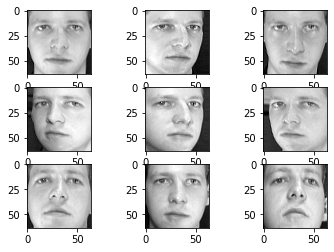

In [13]:
# Importing fetch_olivetti_faces dataset
facesData = datasets.fetch_olivetti_faces()
faces_shape = int(facesData.data.shape[1]**(0.5))
faces_labels_count = len(np.unique(facesData.target))
print("faces_labels_count = ",faces_labels_count)
# Reshape images to face shape
faceData_data_resh= facesData.data.reshape(facesData.data.shape[0],faces_shape, faces_shape,1)
faceData_data_resh.shape
# No padding needed 
print("faceData_data_resh shape = ",faceData_data_resh.shape)
# Split and shuffle
X_train_faces, X_test_faces, y_train_faces, y_test_faces = generate_data(faceData_data_resh, facesData.target,0.3)
print("X_train_face shape = ",X_train_faces.shape)
# Plotting images
plot_images(facesData.images)

(280, 227, 227, 1)


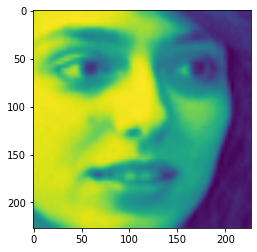

In [14]:
resized_faces_train = np.array(resize_images(X_train_faces))
plt.imshow(tf.reshape(resized_faces_train[0],[227,227]))
print(resized_faces_train.shape)

*****  Some image samples ******


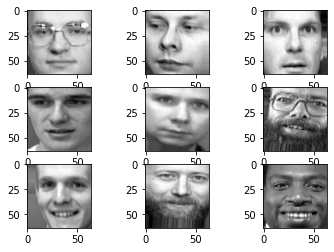

In [15]:
# Data Augmentation
datagen_face = ImageDataGenerator(
            rotation_range=10,
            width_shift_range=0.1, 
            height_shift_range=0.1, 
            zoom_range=0.1
            )
datagen_face.fit(X_train_faces)
train_generator_faces = datagen_face.flow(X_train_faces, y_train_faces)
test_generator_faces = ImageDataGenerator().flow(X_test_faces, y_test_faces)
# Showing some augmented images
plot_augmented_images(train_generator_faces,shape_after=(faces_shape,faces_shape))

### Creating and traning CNN models

LE-NET5 models

#### 1. Digit data set

In [17]:
# Creating lenet15_digit_model with an input shape equalt to digitData_data_resh[0].shape
lenet15_digit_model = create_lenet15_model(digit_labels_count,input_shape=digitData_data_resh[0].shape)
lenet15_digit_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 120)               0

Epoch 1/50
40/40 [==============================] - 2s 27ms/step - loss: 2.2734 - accuracy: 0.1687 - val_loss: 2.0820 - val_accuracy: 0.4056
Epoch 2/50
40/40 [==============================] - 1s 23ms/step - loss: 2.0549 - accuracy: 0.2944 - val_loss: 1.5976 - val_accuracy: 0.5630
Epoch 3/50
40/40 [==============================] - 1s 23ms/step - loss: 1.7717 - accuracy: 0.4018 - val_loss: 1.2889 - val_accuracy: 0.6185
Epoch 4/50
40/40 [==============================] - 1s 22ms/step - loss: 1.5038 - accuracy: 0.4781 - val_loss: 1.0533 - val_accuracy: 0.7481
Epoch 5/50
40/40 [==============================] - 1s 23ms/step - loss: 1.3507 - accuracy: 0.5306 - val_loss: 0.9105 - val_accuracy: 0.7444
Epoch 6/50
40/40 [==============================] - 2s 39ms/step - loss: 1.0940 - accuracy: 0.6285 - val_loss: 0.7727 - val_accuracy: 0.7407
Epoch 7/50
40/40 [==============================] - 2s 37ms/step - loss: 1.0214 - accuracy: 0.6643 - val_loss: 0.7368 - val_accuracy: 0.7852
Epoch 8/50
40

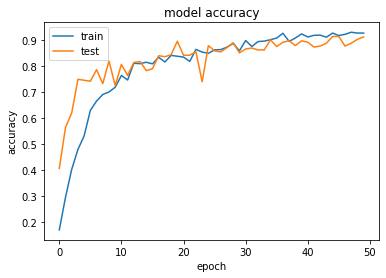

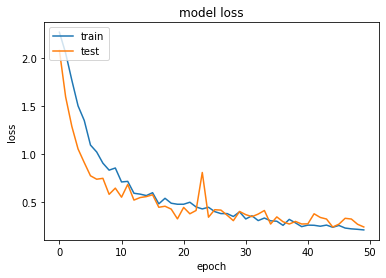

Recall_score : 0.9111111111111111
Precision_score: 0.9111111111111111
F1_score : 0.9111111111111111
Model acccuracy: 0.9111111111111111


In [18]:
tf.random.set_seed(7)
history = lenet15_digit_model.fit(train_generator, epochs=50,batch_size=256,validation_data=test_generator)
# Predict the data
y_pred = np.argmax(lenet15_digit_model.predict(X_test_digit),axis=1)
# Evaluation
print('Model Evaluation : \n')
plot_training_history(history)
evaluation_metrics(y_test_digit,y_pred)

#### 2. Overletti_faces data set

In [19]:
# Creating lenet15_faces_model with an input shape equal to the shape of a face image (64,64,1)
lenet15_faces_model = create_lenet15_model(faces_labels_count)
lenet15_faces_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 64, 64, 6)         156       
                                                                 
 average_pooling2d_2 (Averag  (None, 32, 32, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 16)        2416      
                                                                 
 average_pooling2d_3 (Averag  (None, 14, 14, 16)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_5 (Conv2D)           (None, 10, 10, 120)       48120     
                                                                 
 flatten_1 (Flatten)         (None, 12000)            

Epoch 1/50
9/9 [==============================] - 1s 120ms/step - loss: 4.0582 - accuracy: 0.0179 - val_loss: 3.8050 - val_accuracy: 0.0083
Epoch 2/50
9/9 [==============================] - 1s 134ms/step - loss: 3.7448 - accuracy: 0.0250 - val_loss: 3.7452 - val_accuracy: 0.0083
Epoch 3/50
9/9 [==============================] - 1s 156ms/step - loss: 3.6783 - accuracy: 0.0393 - val_loss: 3.6894 - val_accuracy: 0.0583
Epoch 4/50
9/9 [==============================] - 1s 148ms/step - loss: 3.6160 - accuracy: 0.0750 - val_loss: 3.6111 - val_accuracy: 0.0417
Epoch 5/50
9/9 [==============================] - 1s 155ms/step - loss: 3.5503 - accuracy: 0.0893 - val_loss: 3.6109 - val_accuracy: 0.0833
Epoch 6/50
9/9 [==============================] - 1s 157ms/step - loss: 3.4356 - accuracy: 0.1000 - val_loss: 3.3716 - val_accuracy: 0.1333
Epoch 7/50
9/9 [==============================] - 1s 124ms/step - loss: 3.2194 - accuracy: 0.1893 - val_loss: 3.1701 - val_accuracy: 0.1333
Epoch 8/50
9/9 [====

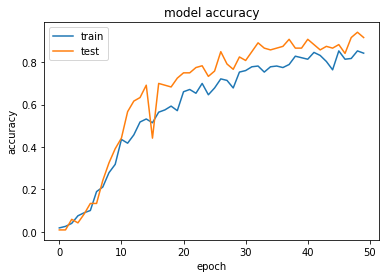

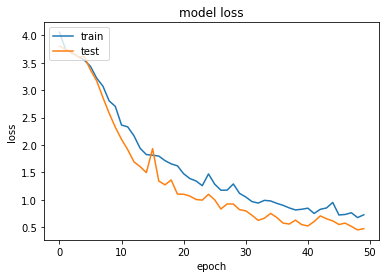

Recall_score : 0.9166666666666666
Precision_score: 0.9166666666666666
F1_score : 0.9166666666666666
Model acccuracy: 0.9166666666666666


In [20]:
tf.random.set_seed(7)
history_faces = lenet15_faces_model.fit(train_generator_faces, epochs=50,batch_size=64,validation_data=test_generator_faces)
# Predict the data
y_pred_faces = np.argmax(lenet15_faces_model.predict(X_test_faces),axis=1)
# Evaluation
print('Model Evaluation : \n')
plot_training_history(history_faces)
evaluation_metrics(y_test_faces,y_pred_faces)

The LE-NET5 model gave very good results (accuracy) on both datasets. Can be improved through more epochs.

##Part 2 : Fine-tuning a pretrained model


In [17]:
facesData = datasets.fetch_olivetti_faces()
X = facesData.images
y = facesData.target

###Fine-tuning the pretrained model VGG19

#### Fine-tuning VGG19 adding 1 fully connected layer with 256 neurones

In [ ]:
X_train, y_train,X_test,y_test=pretraitement(X,y)
X_train = keras.applications.vgg19.preprocess_input(tf.cast(X_train, tf.float32))
X_test = keras.applications.vgg19.preprocess_input(tf.cast(X_test, tf.float32))

model = keras.Sequential()
base_model = keras.applications.VGG19(include_top=False,weights='imagenet',input_shape=X_train.shape[1:])
for layer in base_model.layers[:-2]:
   layer.trainable = False

model.add(base_model)
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation='relu'))  
model.add(keras.layers.Dense(40, activation='softmax'))  

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy','Recall', 'Precision'])
history = model.fit(X_train, y_train, validation_split=0.2, epochs=45)

model.evaluate(X_test, y_test)

Epoch 1/45
7/7 [==============================] - 35s 4s/step - loss: 15.8272 - accuracy: 0.0179 - recall: 0.0089 - precision: 0.0208 - val_loss: 3.6939 - val_accuracy: 0.0179 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 2/45
7/7 [==============================] - 28s 4s/step - loss: 3.6866 - accuracy: 0.0312 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 3.6913 - val_accuracy: 0.0000e+00 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 3/45
7/7 [==============================] - 28s 4s/step - loss: 3.6833 - accuracy: 0.0357 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 3.6977 - val_accuracy: 0.0000e+00 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 4/45
7/7 [==============================] - 28s 4s/step - loss: 3.6780 - accuracy: 0.0357 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 3.7039 - val_accuracy: 0.0000e+00 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 5/45
7/7 [==============================] - 2

[3.88525652885437, 0.008333333767950535, 0.0, 0.0]

#### Fine-tuning VGG19 adding 2 fully connected layers, the first with 256 neurones and the second with 512 neurones.
The learning rate=0.01

In [ ]:
X_train, y_train,X_test,y_test=pretraitement(X,y)
X_train = keras.applications.vgg19.preprocess_input(tf.cast(X_train, tf.float32))
X_test = keras.applications.vgg19.preprocess_input(tf.cast(X_test, tf.float32))

model1 = keras.Sequential()
base_model = keras.applications.VGG19(include_top=False,weights='imagenet',input_shape=X_train.shape[1:])
for layer in base_model.layers[:-2]:
   layer.trainable = False

model1.add(base_model)
model1.add(keras.layers.Flatten())
model1.add(keras.layers.Dense(256, activation='relu'))  
model1.add(keras.layers.Dense(512, activation='relu'))  
model1.add(keras.layers.Dense(40, activation='softmax'))  

model1.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy','Recall', 'Precision'])
history = model1.fit(X_train, y_train, validation_split=0.2, epochs=45)

model1.evaluate(X_test, y_test)

Epoch 1/45
7/7 [==============================] - 36s 5s/step - loss: 10.9673 - accuracy: 0.0179 - recall: 0.0134 - precision: 0.0312 - val_loss: 3.6906 - val_accuracy: 0.0179 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 2/45
7/7 [==============================] - 28s 4s/step - loss: 3.6916 - accuracy: 0.0134 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 3.6926 - val_accuracy: 0.0179 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 3/45
7/7 [==============================] - 28s 4s/step - loss: 3.6846 - accuracy: 0.0179 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 3.7293 - val_accuracy: 0.0179 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 4/45
7/7 [==============================] - 28s 4s/step - loss: 3.6718 - accuracy: 0.0357 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 3.7610 - val_accuracy: 0.0179 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 5/45
7/7 [==============================] - 28s 4s/step -

[3.881037950515747, 0.01666666753590107, 0.0, 0.0]

#### Fine-tuning VGG19 adding 2 fully connected layers, the first with 256 neurones and the second with 512 neurones
the learning rate=0.1

In [ ]:
X_train, y_train,X_test,y_test=pretraitement(X,y)
X_train = keras.applications.vgg19.preprocess_input(tf.cast(X_train, tf.float32))
X_test = keras.applications.vgg19.preprocess_input(tf.cast(X_test, tf.float32))

model2 = keras.Sequential()
base_model = keras.applications.VGG19(include_top=False,weights='imagenet',input_shape=X_train.shape[1:])
for layer in base_model.layers[:-2]:
   layer.trainable = False

model2.add(base_model)
model2.add(keras.layers.Flatten())
model2.add(keras.layers.Dense(256, activation='relu'))  
model2.add(keras.layers.Dense(512, activation='relu'))  
model2.add(keras.layers.Dense(40, activation='softmax'))  

model2.compile(optimizer=keras.optimizers.Adam(learning_rate=0.1),loss='categorical_crossentropy',metrics=['accuracy','Recall', 'Precision'])
history = model2.fit(X_train, y_train, validation_split=0.2, epochs=45)

model2.evaluate(X_test, y_test)

Epoch 1/45
7/7 [==============================] - 29s 4s/step - loss: 7724.1250 - accuracy: 0.0268 - recall: 0.0134 - precision: 0.0234 - val_loss: 3.9016 - val_accuracy: 0.0179 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 2/45
7/7 [==============================] - 28s 4s/step - loss: 4.4122 - accuracy: 0.0089 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 4.2303 - val_accuracy: 0.0179 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 3/45
7/7 [==============================] - 28s 4s/step - loss: 3.8528 - accuracy: 0.0179 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 3.8306 - val_accuracy: 0.0179 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 4/45
7/7 [==============================] - 28s 4s/step - loss: 3.6968 - accuracy: 0.0402 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 3.8155 - val_accuracy: 0.0179 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 5/45
7/7 [==============================] - 28s 4s/step

[3.891087770462036, 0.01666666753590107, 0.0, 0.0]

Results : With fine-tuning, we obtained very low accuracy over the different created models which is expected because of the nature(faces only) and size(smaller) of the used dataset compared to the imagenet. Also extraction from a humain face differs to extracting features from various types of images like trees cats or cars. This problem is due to going from a generalized solution to a more destinated one.

###Fine-tuning the pretrained model ResNet

#### Fine-tuning ResNet152V2 adding 1 fully connected layer with 256 neurones

In [ ]:
X_train, y_train,X_test,y_test=pretraitement(X,y)
X_train = keras.applications.resnet_v2.preprocess_input(tf.cast(X_train, tf.float32))
X_test = keras.applications.resnet_v2.preprocess_input(tf.cast(X_test, tf.float32))
model3 = keras.Sequential()
base_model = keras.applications.ResNet152V2(include_top=False,weights='imagenet',input_shape=X_train.shape[1:])
for layer in base_model.layers[:-2]:
  layer.trainable = False

model3.add(base_model)
model3.add(keras.layers.Flatten())
model3.add(keras.layers.Dense(256, activation='relu'))  
model3.add(keras.layers.Dense(40, activation='softmax'))  
model3.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy','Recall', 'Precision'])
history = model3.fit(X_train, y_train, validation_split=0.2, epochs=45)
model3.evaluate(X_test, y_test)

Epoch 1/45
7/7 [==============================] - 36s 4s/step - loss: 39.5607 - accuracy: 0.0357 - recall: 0.0268 - precision: 0.0321 - val_loss: 17.3508 - val_accuracy: 0.0179 - val_recall: 0.0179 - val_precision: 0.0185
Epoch 2/45
7/7 [==============================] - 21s 3s/step - loss: 17.3596 - accuracy: 0.1473 - recall: 0.1339 - precision: 0.1974 - val_loss: 18.6036 - val_accuracy: 0.0179 - val_recall: 0.0179 - val_precision: 0.0179
Epoch 3/45
7/7 [==============================] - 21s 3s/step - loss: 4.2208 - accuracy: 0.2411 - recall: 0.1652 - precision: 0.5692 - val_loss: 9.7214 - val_accuracy: 0.0536 - val_recall: 0.0357 - val_precision: 0.0426
Epoch 4/45
7/7 [==============================] - 21s 3s/step - loss: 2.9945 - accuracy: 0.1786 - recall: 0.0848 - precision: 0.7917 - val_loss: 7.5576 - val_accuracy: 0.0357 - val_recall: 0.0179 - val_precision: 0.0278
Epoch 5/45
7/7 [==============================] - 21s 3s/step - loss: 2.6590 - accuracy: 0.2812 - recall: 0.1116 - p

[1.3223329782485962, 0.7166666388511658, 0.5916666388511658, 0.887499988079071]

#### Fine-tuning ResNet152V2 adding 2 fully connected layers, the first with 256 neurones and the second with 512 neurones.
The learning rate=0.01

In [ ]:
X_train, y_train,X_test,y_test=pretraitement(X,y)
X_train = keras.applications.resnet_v2.preprocess_input(tf.cast(X_train, tf.float32))
X_test = keras.applications.resnet_v2.preprocess_input(tf.cast(X_test, tf.float32))
model4 = keras.Sequential()
base_model = keras.applications.ResNet50V2(include_top=False,weights='imagenet',input_shape=X_train.shape[1:])
for layer in base_model.layers[:-2]:
  layer.trainable = False

model4.add(base_model)
model4.add(keras.layers.Flatten())
model4.add(keras.layers.Dense(256, activation='relu'))  
model4.add(keras.layers.Dense(512, activation='relu'))  
model4.add(keras.layers.Dense(40, activation='softmax'))  
model4.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy','Recall', 'Precision'])
history = model4.fit(X_train, y_train, validation_split=0.2, epochs=45)
model4.evaluate(X_test, y_test)

Epoch 1/45
7/7 [==============================] - 13s 1s/step - loss: 31.6107 - accuracy: 0.0134 - recall: 0.0134 - precision: 0.0170 - val_loss: 4.1092 - val_accuracy: 0.0357 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 2/45
7/7 [==============================] - 7s 1s/step - loss: 4.5878 - accuracy: 0.0580 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 3.6667 - val_accuracy: 0.0536 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 3/45
7/7 [==============================] - 7s 1s/step - loss: 3.5768 - accuracy: 0.0625 - recall: 0.0134 - precision: 0.2727 - val_loss: 3.6785 - val_accuracy: 0.0536 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 4/45
7/7 [==============================] - 7s 1s/step - loss: 3.6093 - accuracy: 0.0804 - recall: 0.0179 - precision: 0.3636 - val_loss: 3.7059 - val_accuracy: 0.0179 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 5/45
7/7 [==============================] - 7s 1s/step - loss: 3.6097 - accu

[3.550048828125, 0.01666666753590107, 0.0, 0.0]

#### Fine-tuning ResNet152V2 adding 2 fully connected layers, the first with 256 neurones and the second with 512 neurones
the learning rate=0.1

In [ ]:
X_train, y_train,X_test,y_test=pretraitement(X,y)
X_train = keras.applications.resnet_v2.preprocess_input(tf.cast(X_train, tf.float32))
X_test = keras.applications.resnet_v2.preprocess_input(tf.cast(X_test, tf.float32))
model5 = keras.Sequential()
base_model = keras.applications.ResNet152V2(include_top=False,weights='imagenet',input_shape=X_train.shape[1:])
for layer in base_model.layers[:-2]:
  layer.trainable = False

model5.add(base_model)
model5.add(keras.layers.Flatten())
model5.add(keras.layers.Dense(256, activation='relu'))  
model5.add(keras.layers.Dense(512, activation='relu'))  
model5.add(keras.layers.Dense(40, activation='softmax'))  
model5.compile(optimizer=keras.optimizers.Adam(learning_rate=0.1),loss='categorical_crossentropy',metrics=['accuracy','Recall', 'Precision'])
history = model5.fit(X_train, y_train, validation_split=0.2, epochs=45)
model5.evaluate(X_test, y_test)

Epoch 1/45
7/7 [==============================] - 34s 4s/step - loss: 2086.2766 - accuracy: 0.0179 - recall: 0.0134 - precision: 0.0156 - val_loss: 4340.7139 - val_accuracy: 0.0179 - val_recall: 0.0179 - val_precision: 0.0179
Epoch 2/45
7/7 [==============================] - 20s 3s/step - loss: 45.6999 - accuracy: 0.0134 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 5270.3604 - val_accuracy: 0.0179 - val_recall: 0.0179 - val_precision: 0.0179
Epoch 3/45
7/7 [==============================] - 20s 3s/step - loss: 20.4397 - accuracy: 0.0134 - recall: 0.0045 - precision: 0.0154 - val_loss: 3476.8835 - val_accuracy: 0.0179 - val_recall: 0.0179 - val_precision: 0.0179
Epoch 4/45
7/7 [==============================] - 20s 3s/step - loss: 3.9257 - accuracy: 0.0402 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 2728.2249 - val_accuracy: 0.0179 - val_recall: 0.0179 - val_precision: 0.0179
Epoch 5/45
7/7 [==============================] - 20s 3s/step - loss: 3.7055 - accuracy

[3.8652496337890625, 0.01666666753590107, 0.0, 0.0]

#### Fine-tuning ResNet152V2 without adding fully connected layers

In [ ]:
X_train, y_train,X_test,y_test=pretraitement(X,y)
X_train = keras.applications.resnet_v2.preprocess_input(tf.cast(X_train, tf.float32))
X_test = keras.applications.resnet_v2.preprocess_input(tf.cast(X_test, tf.float32))
model6 = keras.Sequential()
base_model = keras.applications.ResNet152V2(include_top=False,weights='imagenet',input_shape=X_train.shape[1:])
for layer in base_model.layers[:-2]:
  layer.trainable = False

model6.add(base_model)
model6.add(keras.layers.Flatten())
model6.add(keras.layers.Dense(40, activation='softmax'))  
model6.compile(optimizer=keras.optimizers.Adam(learning_rate=0.1),loss='categorical_crossentropy',metrics=['accuracy','Recall', 'Precision'])
history = model6.fit(X_train, y_train, validation_split=0.2, epochs=45)
model6.evaluate(X_test, y_test)

Epoch 1/45
7/7 [==============================] - 34s 4s/step - loss: 225.4162 - accuracy: 0.0982 - recall: 0.0982 - precision: 0.1158 - val_loss: 175.1718 - val_accuracy: 0.0179 - val_recall: 0.0179 - val_precision: 0.0179
Epoch 2/45
7/7 [==============================] - 21s 3s/step - loss: 53.9214 - accuracy: 0.3527 - recall: 0.3527 - precision: 0.3543 - val_loss: 133.8676 - val_accuracy: 0.0179 - val_recall: 0.0179 - val_precision: 0.0179
Epoch 3/45
7/7 [==============================] - 21s 3s/step - loss: 4.0120 - accuracy: 0.7009 - recall: 0.6964 - precision: 0.7123 - val_loss: 143.4925 - val_accuracy: 0.0179 - val_recall: 0.0179 - val_precision: 0.0179
Epoch 4/45
7/7 [==============================] - 21s 3s/step - loss: 0.6487 - accuracy: 0.8929 - recall: 0.8929 - precision: 0.9050 - val_loss: 123.4501 - val_accuracy: 0.0179 - val_recall: 0.0179 - val_precision: 0.0179
Epoch 5/45
7/7 [==============================] - 21s 3s/step - loss: 0.1758 - accuracy: 0.9643 - recall: 0.9

[2.1371123790740967, 0.6916666626930237, 0.574999988079071, 0.75]

### Interpretation :
The best model is obtained by fine-tuning ResNet152V2 model and adding 1 fully connected layers with 256 neurones and activation function=Relu
optimization algorithm=Adam with learning rate = 0.01


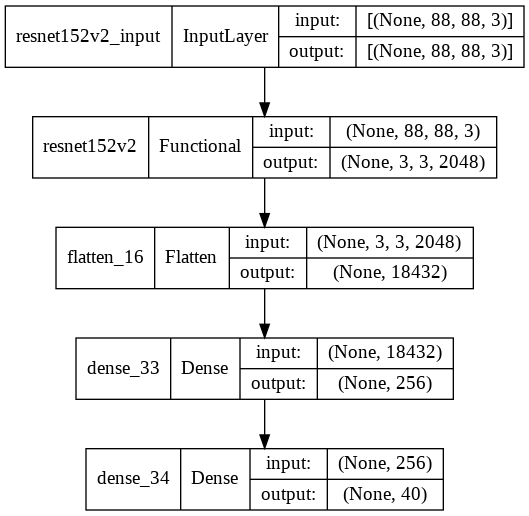

In [ ]:
plot_model(model3, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

## Part 3 : CNN vs FC
Interpretation :  Fine-Tuning Resnet50v2 pretrained model on the faces dataset gave better performance than fine-tuning VGG16.

The CNNs from this lab gave better results, less computation time and less overfitting (the models can train more and have even better accuracy) than the fully connected model on image data.


